In [25]:
import pandas as pd
import scipy
import statistics
import csv as csv
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

In [26]:
energy = "energy_data.csv"

In [27]:
combined_df = pd.read_csv('Resources/combined_data.csv')
combined_df.rename(columns = {'TAVG':'Temperature'}, inplace = True)
combined_df.head()

,Year,Month,State,Temperature,Population,Consumption
0,2001,1,Alabama,41.736,4467634,64497509.0
1,2001,2,Alabama,52.996,4467634,55262245.0
2,2001,3,Alabama,52.004,4467634,57230386.0
3,2001,4,Alabama,64.964,4467634,48047333.0
4,2001,5,Alabama,71.092,4467634,60217334.0


In [28]:
combined_df['Date'] = pd.to_datetime(combined_df['Year']*10000+combined_df['Month']*100+15,format='%Y%m%d')
combined_df

,Year,Month,State,Temperature,Population,Consumption,Date
0,2001,1,Alabama,41.736,4467634,64497509.0,2001-01-15
1,2001,2,Alabama,52.996,4467634,55262245.0,2001-02-15
2,2001,3,Alabama,52.004,4467634,57230386.0,2001-03-15
3,2001,4,Alabama,64.964,4467634,48047333.0,2001-04-15
4,2001,5,Alabama,71.092,4467634,60217334.0,2001-05-15
...,...,...,...,...,...,...,...
4262,2007,8,Wyoming,68.132,534876,46454238.0,2007-08-15
4263,2007,9,Wyoming,57.536,534876,43742967.0,2007-09-15
4264,2007,10,Wyoming,45.324,534876,43819838.0,2007-10-15
4265,2007,11,Wyoming,34.868,534876,43628693.0,2007-11-15


In [42]:
combined_df['Consumption_Summary'] = round(combined_df['Consumption']/1000000000,2)

In [43]:
consumption = combined_df.groupby('Date')['Consumption_Summary'].sum()
consumption

Date
2001-01-15    2.26
2001-02-15    1.90
2001-03-15    2.03
2001-04-15    1.93
2001-05-15    2.06
              ... 
2007-08-15    2.98
2007-09-15    2.45
2007-10-15    2.30
2007-11-15    2.08
2007-12-15    2.33
Name: Consumption_Summary, Length: 84, dtype: float64

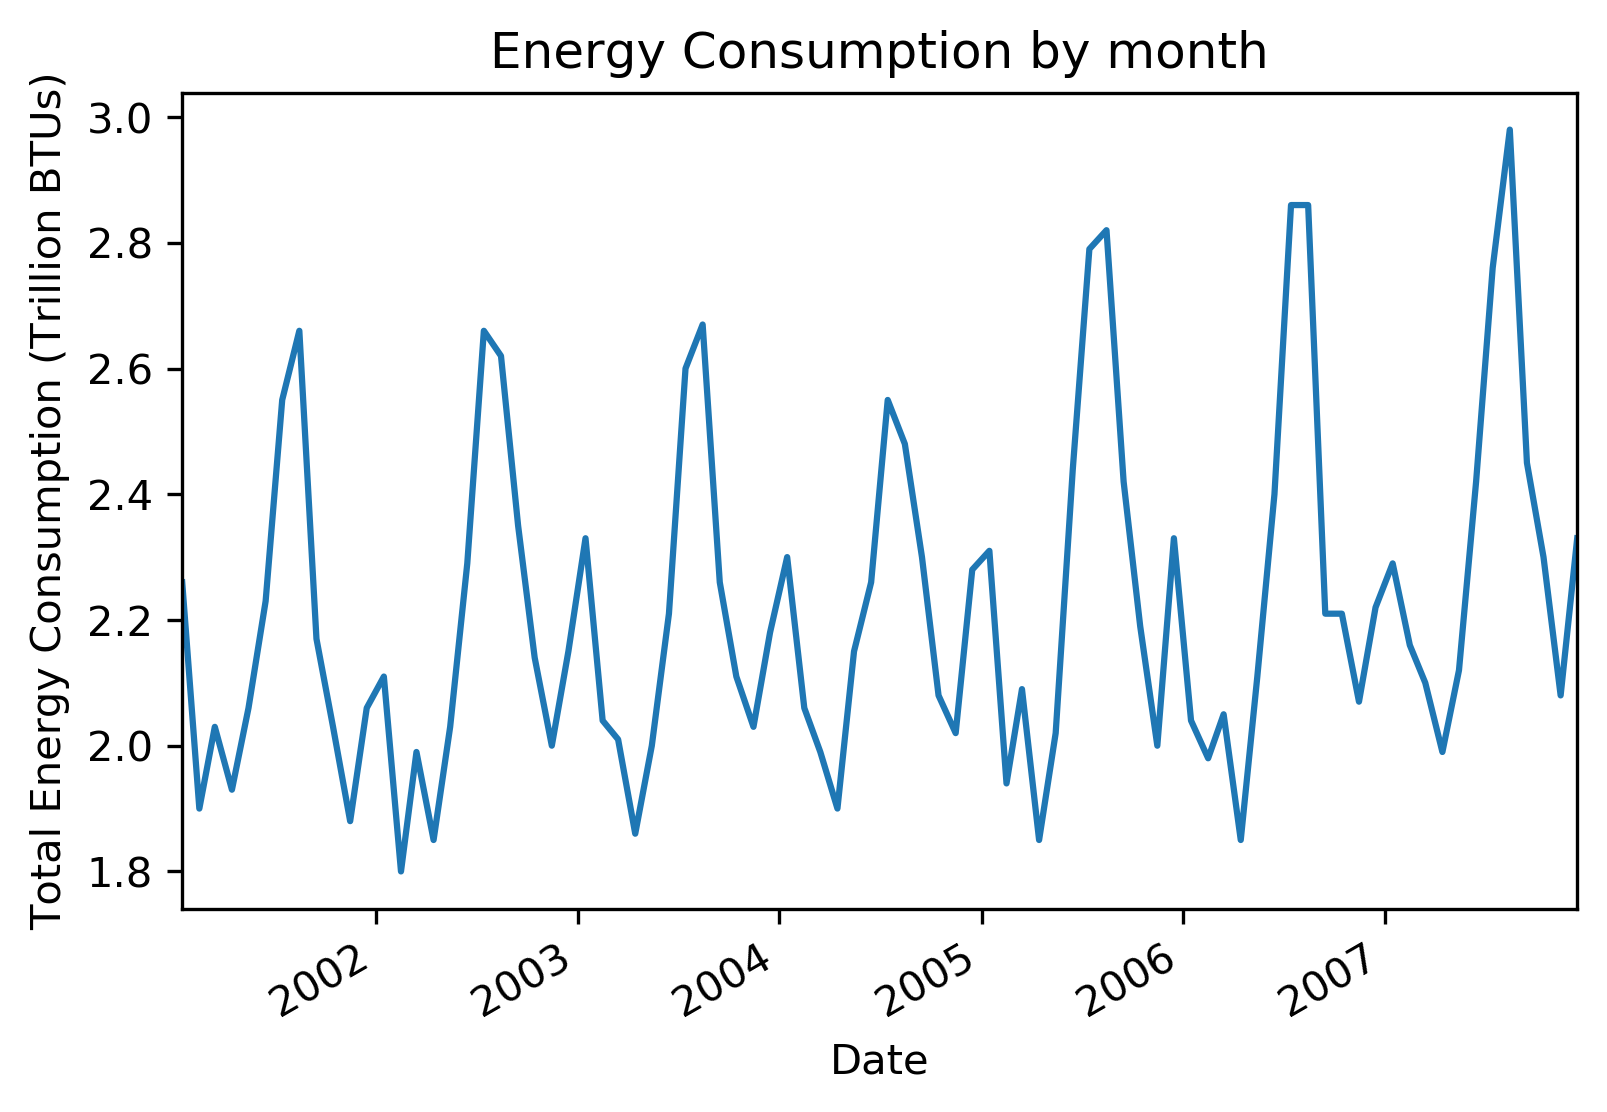

In [49]:
ax = consumption.plot(kind = 'line',title = "Energy Consumption by month")
ax.set_ylabel('Total Energy Consumption (Trillion BTUs)')

ax.figure.savefig(f'Images/Energy Comsumption by month.png', dpi=300)


In [45]:
consumption_year = combined_df.groupby('Year')['Consumption_Summary'].sum()
consumption_year.head()

Year
2001    25.76
2002    25.99
2003    26.30
2004    26.37
2005    27.20
Name: Consumption_Summary, dtype: float64

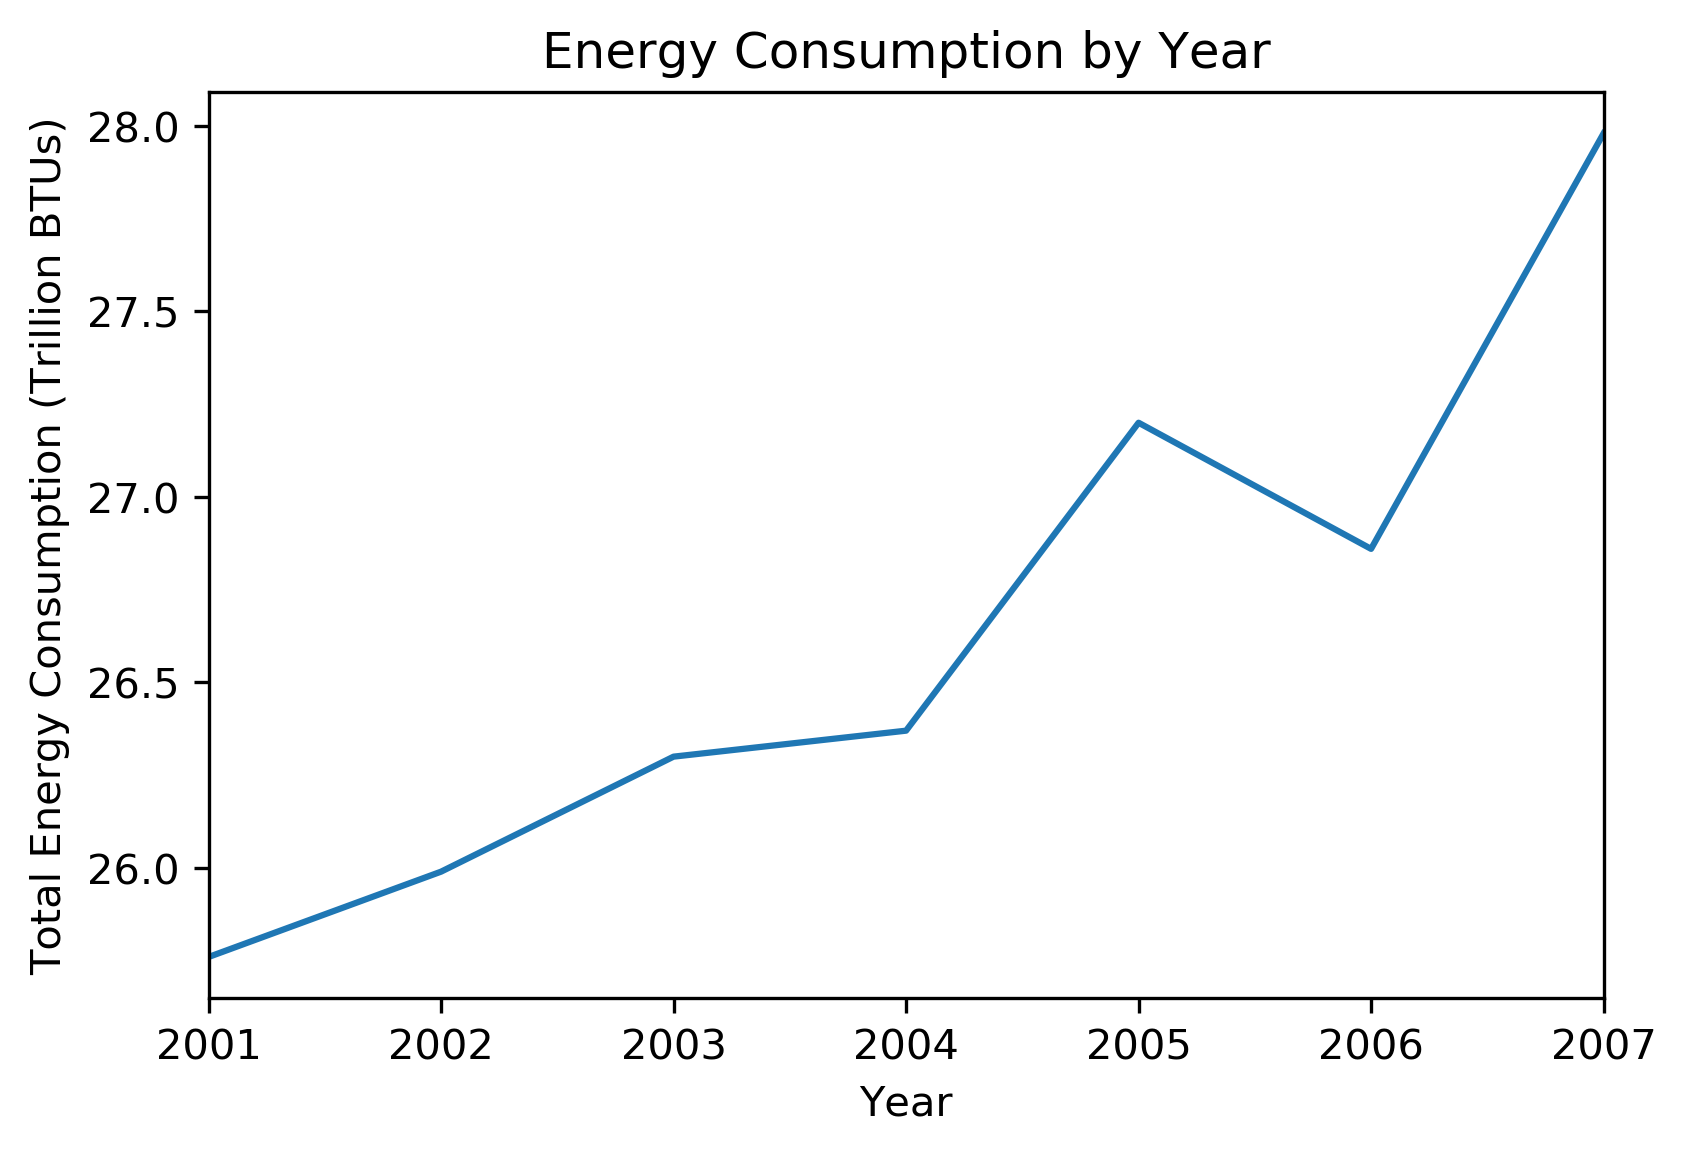

In [48]:
ax = consumption_year.plot(kind = 'line',title = "Energy Consumption by Year")
ax.set_ylabel('Total Energy Consumption (Trillion BTUs)')

ax.figure.savefig(f'Images/Energy Consumption by year.png', dpi=300)
